# Task 4: Introduction to Deep Learning with TensorFlow & Keras

## Section 1: Setup & Dataset

### **Task 1**: Import Dependencies and Load Data
*Instruction*: Use the MNIST dataset (handwritten digit classification). Load it from tf.keras.datasets and normalize the pixel values.

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and normalize
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

## Section 2: Data Exploration

### **Task 2**: Visualize Sample Images

*Instruction*: Plot the first 10 images with their corresponding labels.


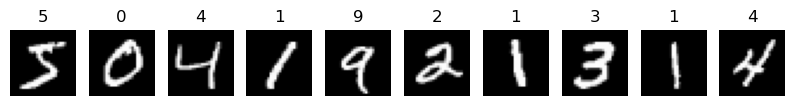

In [3]:
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

## Section 3: Build a Neural Network

### **Task 3**: Define a Simple MLP Model

*Instruction*: Use Keras to create a simple feedforward neural network with:


*   Input layer (flatten)
*   2 hidden layers (128, 64 neurons) with ReLU
*   Output layer with softmax


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


C:\Users\lenovo\Miniconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Section 4: Compile & Train

### **Task 4**: Compile and Fit the Model

*Instruction*: Compile using `adam` optimizer and `sparse_categorical_crossentropy` as loss function. Train for 10 epochs.

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8665 - loss: 0.4620 - val_accuracy: 0.9678 - val_loss: 0.1138
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9657 - loss: 0.1120 - val_accuracy: 0.9735 - val_loss: 0.0858
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9786 - loss: 0.0709 - val_accuracy: 0.9745 - val_loss: 0.0874
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9820 - loss: 0.0548 - val_accuracy: 0.9765 - val_loss: 0.0873
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9868 - loss: 0.0416 - val_accuracy: 0.9753 - val_loss: 0.0851
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9902 - loss: 0.0315 - val_accuracy: 0.9793 - val_loss: 0.0713
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9914 - loss: 0.0259 - val_accuracy: 0.9792 - val_loss: 0.0819
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9926 - loss: 0.0208 - 

## Section 5: Evaluate the Model

### **Task 5**:  Test Accuracy and Confusion Matrix

*Instruction*: Evaluate the model on the test set and print confusion matrix.


In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

y_pred = np.argmax(model.predict(X_test), axis=1)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9742 - loss: 0.1092
Test Accuracy: 0.98
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step
[[ 965    0    6    0    1    1    3    3    1    0]
 [   0 1125    3    0    0    1    2    2    2    0]
 [   2    0 1019    4    2    0    1    2    2    0]
 [   0    0   11  984    0    4    0    4    3    4]
 [   0    0    4    1  958    1    3    3    2   10]
 [   2    0    0    6    1  870    3    1    5    4]
 [   1    2    3    1    3    5  940    0    3    0]
 [   0    3   11    2    0    0    0 1008    0    4]
 [   1    0   11    4    5   10    3    4  934    2]
 [   1    3    0    4   13    2    0   11    2  973]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.99      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.97      0.98      0.98       982
      

## Section 6: Plot Training History

### **Task 6**: Visualize Accuracy and Loss

*Instruction*: Plot training vs validation accuracy and loss over epochs.

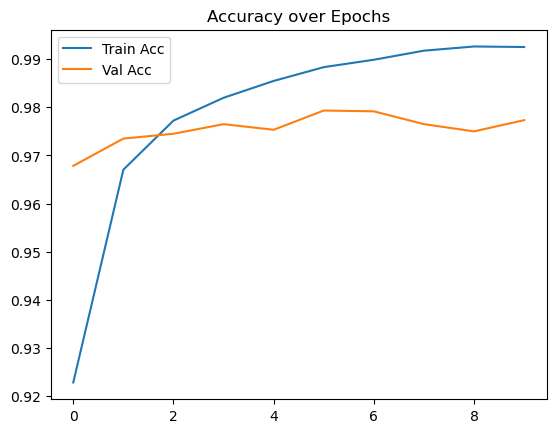

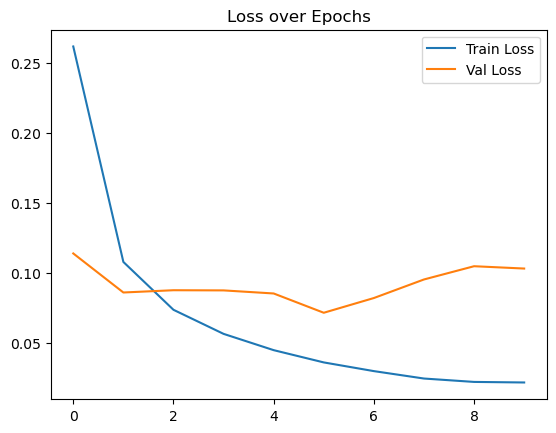

In [7]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()